In [164]:
import pandas as pd 
import os
print(os.getcwd())

C:\Users\User


In [1]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Msc Computational physics\\Υπολογιστική Κβαντομηχανική\\HIGGS_8K.csv')
df

NameError: name 'pd' is not defined

In [166]:
data_class= df.iloc[:,0] #Classification(1=signal,0=background)
data_21 = df.iloc[:,1:21] #Low level quantities
data_28 = df.iloc[:,22:] #High levev quantities
data_all = df.iloc[:,1:] #All data low and high

In [167]:
from sklearn.model_selection import train_test_split
data21_train, data21_test, data21_class_train, data21_class_test = train_test_split(data_21, data_class, test_size = 0.25, random_state = 42)
data28_train, data28_test, data28_class_train, data28_class_test = train_test_split(data_28, data_class, test_size = 0.25, random_state = 42)
dataAll_train, dataAll_test, dataAll_class_train, dataAll_class_test = train_test_split(data_all, data_class, test_size = 0.25, random_state = 42)

In [168]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
#name StandardScaler()
scaler = StandardScaler()
# Low quantities
data21_train_scaled = scaler.fit_transform(data21_train)
data21_test_scaled =scaler.transform(data21_test)
#High quantities
data28_train_scaled = scaler.fit_transform(data28_train)
data28_test_scaled =scaler.transform(data28_test)
#All quantities
dataAll_train_scaled = scaler.fit_transform(dataAll_train)
dataAll_test_scaled =scaler.transform(dataAll_test)

In [169]:
from sklearn.neighbors import KNeighborsClassifier
#choosing the Eucledian distance (See classifier's help) 
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(data21_train_scaled, data21_class_train)

#classifier.fit(data28_train_scaled, data28_class_train)

#classifier.fit(dataAll_train_scaled, dataAll_class_train)

KNeighborsClassifier()

In [170]:
data21_test_pred = classifier.predict(data21_test_scaled)
data21_test_pred


array([0., 1., 1., ..., 1., 0., 1.])

In [171]:
classifier.fit(data28_train_scaled, data28_class_train)

KNeighborsClassifier()

In [172]:
data28_test_pred = classifier.predict(data28_test_scaled)
data28_test_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [173]:
classifier.fit(dataAll_train_scaled, dataAll_class_train)

KNeighborsClassifier()

In [174]:
dataAll_test_pred = classifier.predict(dataAll_test_scaled)
dataAll_test_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm21 = confusion_matrix(data21_class_test, data21_test_pred)
print(cm21)
accuracy_score(data21_class_test, data21_test_pred)

[[446 546]
 [322 686]]


0.566

In [176]:
cm28 = confusion_matrix(data28_class_test, data28_test_pred)
print(cm28)
accuracy_score(data28_class_test, data28_test_pred)

[[600 392]
 [294 714]]


0.657

In [177]:
cmAll = confusion_matrix(dataAll_class_test, dataAll_test_pred)
print(cmAll)
accuracy_score(dataAll_class_test, dataAll_test_pred)

[[505 487]
 [305 703]]


0.604

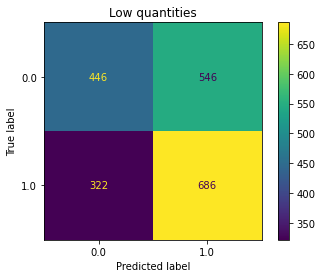

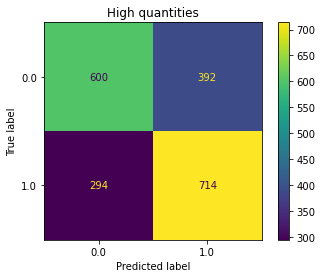

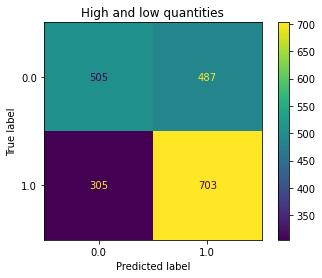

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.title("Low quantities")
plt.show()
disp = ConfusionMatrixDisplay(confusion_matrix=cm28, display_labels=classifier.classes_)
disp.plot()
plt.title("High quantities")
plt.show()
disp = ConfusionMatrixDisplay(confusion_matrix=cmAll, display_labels=classifier.classes_)
disp.plot()
plt.title("High and low quantities")
plt.show()

In [179]:
from sklearn.metrics import classification_report
print("Low quantities\n")
print(classification_report(data21_class_test, data21_test_pred))
print("High quantities\n")
print(classification_report(data28_class_test, data28_test_pred))
print("High and Low quantities")
print(classification_report(dataAll_class_test, dataAll_test_pred))

Low quantities

              precision    recall  f1-score   support

         0.0       0.58      0.45      0.51       992
         1.0       0.56      0.68      0.61      1008

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.56      2000
weighted avg       0.57      0.57      0.56      2000

High quantities

              precision    recall  f1-score   support

         0.0       0.67      0.60      0.64       992
         1.0       0.65      0.71      0.68      1008

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000

High and Low quantities
              precision    recall  f1-score   support

         0.0       0.62      0.51      0.56       992
         1.0       0.59      0.70      0.64      1008

    accuracy                           0.60      2000
   macro avg       0.61      0.60      0.60      2000
weighted avg     